In [151]:
# Import Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from datetime import datetime

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [152]:
# Import and initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

# Setup tweepy API authnetication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [153]:
# set target user
target_user=('@BBC', '@CBS', '@CNN', '@Fox', '@NYTimes')

# Creat a list to store result
sentiments=[]


for news in target_user:
    counter = 0
    public_tweets= api.user_timeline(news, count=100)
    print(news)
   
    for tweet in public_tweets:
        print("tweet %s: %s" % (counter, tweet["text"]))
              
        results=analyzer.polarity_scores(tweet["text"])
        compound=results["compound"]
        pos=results["pos"]
        neu=results["neu"]
        neg=results["neg"]
               
        sentiments.append({"Media Source": news, 
                           "Text": tweet["text"],
                          "Date": tweet["created_at"],
                          "Compound score": compound,
                          "Positive": pos,
                          "Negative": neg,
                          "Neutral": neu,
                         "Tweets Ago": counter})
        counter += 1     

@BBC
tweet 0: The story of a young girl's choice between Oxford and the university of life...

#AnEducation | 10pm | @BBCFour |… https://t.co/TCSjXsn02B
tweet 1: Drama series telling the story of a dysfunctional family, set within a family-run beauty salon.

Age Before Beauty… https://t.co/axP5dYrHMA
tweet 2: How Australia's first gay imam is 'saving lives'. https://t.co/u2QmgRGHCM
tweet 3: RT @bbcwritersroom: Writer Debbie Horsfield's new @BBCOne drama #AgeBeforeBeauty begins tonight (Tue 31 July) at 9pm. 

We caught up with D…
tweet 4: The Old Bridge in Mostar is one of Bosnia-Herzegovina's most famous landmarks. 

But does it connect or divide the… https://t.co/lycdJ43HRh
tweet 5: RT @bbcmusic: "Hopefully my little messages for train passengers will be a nice surprise and a reminder of the power of music as they go ab…
tweet 6: Congratulations John! 🎓 A 95-year-old man has graduated from Oxford University, 76 years after he completed his deg… https://t.co/Mjv2UU11be
tweet 7: Have yo

@CBS
tweet 0: Celebrate #NationalAvocadoDay with @letsmakeadeal. 🥑 Relive this #LMAD moment when an avocado wins one amazing deal! https://t.co/QS8GLajWU5
tweet 1: Housewives. PTA moms. School volunteers. Starting TONIGHT, hear the stories of seemingly innocent women who put it… https://t.co/5TA15OiTuh
tweet 2: This is one allowance that can’t be beat! Kids are winning big this week on @PriceIsRight. 🎉
 https://t.co/lncKu9XvNo
tweet 3: Renowned artists Cher, Philip Glass, Reba McEntire, Wayne Shorter, and the co-creators of #Hamilton will be recogni… https://t.co/PEjjI9MKE1
tweet 4: Who's excited for the return of @MurphyBrownCBS? Here's a behind-the-scenes look at the first table read of the sea… https://t.co/1B5S4WJnCW
tweet 5: Mark your calendars because you won’t want to miss this! Former Secretaries of State @HillaryClinton, @Madeleine, a… https://t.co/JKDPp97OqN
tweet 6: The cast couldn’t be more excited to welcome @ansonmount into the @startrekcbs family! Who’s ready to see the 

@CNN
tweet 0: Texans can now hitch a ride in this self-driving car as part of a pilot ride-sharing program https://t.co/dt3rPGumBX https://t.co/5UdKqPNGMl
tweet 1: Blumenthal on hearing testimony about child separations: One career official said it was the result of a deliberate… https://t.co/XNA8OWZxgj
tweet 2: "There is an unexplainable amount of grief in our city, but also an unexplainable amount of love." In the midst of… https://t.co/S4RbQJqQnJ
tweet 3: Dwayne "The Rock" Johnson surprised his cousin and longtime stunt double, Tanaoi Reed, with a gift that brought him… https://t.co/H0v3mpXlaF
tweet 4: Move over Macron, there's a new bromance at the White House | By Nic Robertson via @CNNOpinion… https://t.co/7DeM6HJtsh
tweet 5: RT @CuomoPrimeTime: "While I'm not using the specific word, 'collusion.' I will remind you, what the whole Mueller investigation is about i…
tweet 6: The Trump Tower meeting: A timeline https://t.co/eb7w6RWAXR https://t.co/sIbEtLDz2k
tweet 7: A child's brain

@Fox
tweet 0: @benschwarz nooo pressure whatsoever
tweet 1: That moment when a white guy says ”there aren’t many women developers” and you cross eyes with any other woman in t… https://t.co/033oMUbEl8
tweet 2: @Mandy_Kerr the winds have been gracious
tweet 3: @soxyface thank you! I’m hydrating ⛲️
tweet 4: I’ll be speaking at @webdirections Code Leaders today at 3.30pm (if I don’t lose my voice in the meantime 😂🤧).

Com… https://t.co/oh0yLrEE0F
tweet 5: One of the reasons I’m so excited to be a part of @helpscout is the commitment to building an inclusive culture wit… https://t.co/6H6GDJ1TON
tweet 6: More Boston snaps. https://t.co/NCcWPSV8yX
tweet 7: RT @helpscout: Said it once, we'll keep saying it: we are thrilled to add you to the team @fox! 🦊 https://t.co/bKc6GSq6tR
tweet 8: @mattopsahl lol, offensive
tweet 9: @tompedals yay, hello, hi! 👋🏻
tweet 10: @madalynrose thanks, Madalyn. 💖
tweet 11: @andymcmillan weee, thank you!!
tweet 12: @jennwrites 💖💖💖
tweet 13: @paulozoom thank you! it

@NYTimes
tweet 0: RT @nytpolitics: Alex Jones, the founder of InfoWars, is seeking over $100,000 in court costs from the parents of Noah Pozner, who died at…
tweet 1: A giant colony of 500,000 breeding pairs of king penguins has lost 90% of its population since 1982, according to a… https://t.co/0R7powHbgN
tweet 2: An artist transformed a Chinatown alley into a blocklong asphalt mural, as part of a NYC program to create art-fill… https://t.co/3VcPPaHxsD
tweet 3: New offices are being designed with a focus on the well-being of the people who work in them: “I definitely find my… https://t.co/8gaAsG70i9
tweet 4: RT @SominiSengupta: A city of empire and jazz and leftist rebels and trees pushing through the moldy old buildings. Now a city at profound…
tweet 5: Evening Briefing: Here's what you need to know at the end of the day https://t.co/DTKywb0jzZ
tweet 6: Is this the end for MoviePass? Here’s a timeline of company’s highs and lows. https://t.co/xh64zQTsx0
tweet 7: The Carr Fire is the 

In [154]:
# create DataFrame from results list
sentiments_pd = pd.DataFrame(sentiments)
sentiments_pd

,Compound score,Date,Media Source,Negative,Neutral,Positive,Text,Tweets Ago
0,0.0000,Tue Jul 31 20:02:08 +0000 2018,@BBC,0.000,1.000,0.000,The story of a young girl's choice between Oxf...,0
1,0.5859,Tue Jul 31 19:01:03 +0000 2018,@BBC,0.000,0.808,0.192,Drama series telling the story of a dysfunctio...,1
2,0.0000,Tue Jul 31 18:02:06 +0000 2018,@BBC,0.000,1.000,0.000,How Australia's first gay imam is 'saving live...,2
3,0.0000,Tue Jul 31 16:33:01 +0000 2018,@BBC,0.000,1.000,0.000,RT @bbcwritersroom: Writer Debbie Horsfield's ...,3
4,0.0000,Tue Jul 31 16:01:02 +0000 2018,@BBC,0.000,1.000,0.000,The Old Bridge in Mostar is one of Bosnia-Herz...,4
5,0.7650,Tue Jul 31 15:19:43 +0000 2018,@BBC,0.000,0.734,0.266,"RT @bbcmusic: ""Hopefully my little messages fo...",5
6,0.6360,Tue Jul 31 14:02:05 +0000 2018,@BBC,0.000,0.792,0.208,Congratulations John! 🎓 A 95-year-old man has ...,6
7,0.0000,Tue Jul 31 13:00:23 +0000 2018,@BBC,0.000,1.000,0.000,Have you ever spotted hidden messages in the H...,7
8,0.5719,Tue Jul 31 11:41:04 +0000 2018,@BBC,0.000,0.812,0.188,RT @BBCEarth: In formation 🙌\n\nLet's celebrat...,8
9,0.7178,Tue Jul 31 11:38:00 +0000 2018,@BBC,0.000,0.769,0.231,Tunnelling work is almost set to begin on Lond...,9


In [155]:
# rearrange table
sentiments2=sentiments_pd[["Media Source", "Date", "Text", "Compound score", "Negative", "Neutral",
                          "Positive", "Tweets Ago"]]
sentiments2["Media Source"]=sentiments2["Media Source"].map(lambda x: x.lstrip('@'))
sentiments2.head()

,Media Source,Date,Text,Compound score,Negative,Neutral,Positive,Tweets Ago
0,BBC,Tue Jul 31 20:02:08 +0000 2018,The story of a young girl's choice between Oxf...,0.0000,0.0,1.000,0.000,0
1,BBC,Tue Jul 31 19:01:03 +0000 2018,Drama series telling the story of a dysfunctio...,0.5859,0.0,0.808,0.192,1
2,BBC,Tue Jul 31 18:02:06 +0000 2018,How Australia's first gay imam is 'saving live...,0.0000,0.0,1.000,0.000,2
3,BBC,Tue Jul 31 16:33:01 +0000 2018,RT @bbcwritersroom: Writer Debbie Horsfield's ...,0.0000,0.0,1.000,0.000,3
4,BBC,Tue Jul 31 16:01:02 +0000 2018,The Old Bridge in Mostar is one of Bosnia-Herz...,0.0000,0.0,1.000,0.000,4


In [156]:
# export data frame to csv file
sentiments2.to_csv("News_Mood_by_tweets.csv", index=False)

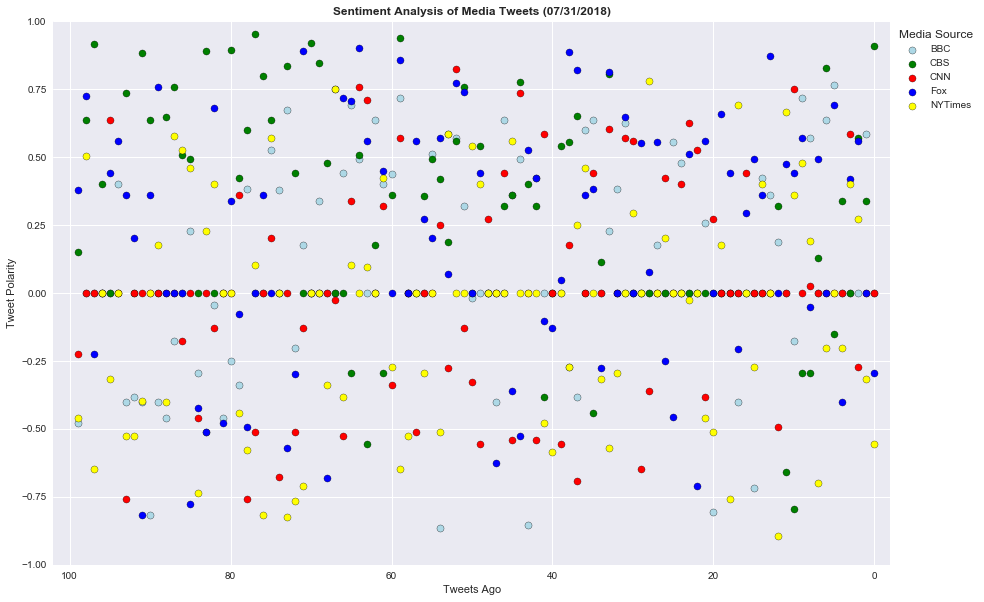

In [157]:
colors = {"BBC": "lightblue", "CBS": "green", "CNN": "red", "Fox": "blue", "NYTimes": "yellow"}
sns.set()
# Scatter Plot for polarity (compound) vs tweets ago

plt.figure(figsize = (15,10))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(102, -2, -1)
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')

for newsoutlet in colors.keys():
    df = sentiments2[sentiments2["Media Source"] == newsoutlet]
    
    plt.scatter(df["Tweets Ago"], df["Compound score"], label=newsoutlet, color = colors[newsoutlet], edgecolor="black" , s=50)

plt.legend(bbox_to_anchor=(1,1), title="Media Source")
plt.savefig("Sentiment_Analysis.png")
plt.show()

In [158]:
# Calculate average of compound score for each news source 
compound_average = sentiments2.groupby("Media Source")["Compound score"].mean()
compound_average

Media Source
BBC        0.084801
CBS        0.248885
CNN        0.018861
Fox        0.187981
NYTimes   -0.059189
Name: Compound score, dtype: float64

In [159]:
# create bar plot of average compound score for each media news
x_axis= sentiments2["Media Source"].unique()
y_axis=compound_average

print(x_axis)
print(y_axis)

['BBC' 'CBS' 'CNN' 'Fox' 'NYTimes']
Media Source
BBC        0.084801
CBS        0.248885
CNN        0.018861
Fox        0.187981
NYTimes   -0.059189
Name: Compound score, dtype: float64


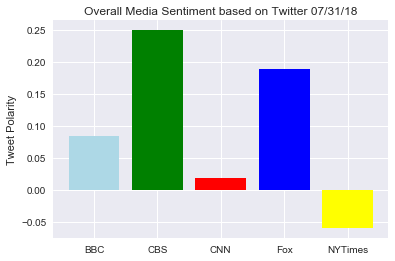

In [160]:
news_color=["lightblue", "green", "red", "blue", "yellow"]
date = time.strftime("%m/%d/%y")

plt.title(f"Overall Media Sentiment based on Twitter {date}")
plt.ylabel("Tweet Polarity")

plt.bar(x_axis,y_axis, color=news_color)
plt.savefig('Overall_Media_Sentiment_based_on_Twitter')
plt.show()

In [161]:
print(" OBSERVATIONS")
print(" 1. CBS has the most positive tweets out of these 5 Media sources")
print(" 2. CNN is the more neutral compare to the rest.  NYTimes is second in line for the neutral news")
print(" 3. Fox is the second highest positive tweets.")

 OBSERVATIONS
 1. CBS has the most positive tweets out of these 5 Media sources
 2. CNN is the more neutral compare to the rest.  NYTimes is second in line for the neutral news
 3. Fox is the second highest positive tweets.
